In [64]:
from textblob import TextBlob
import pandas as pd
import re
import tweepy
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
ps = PorterStemmer()
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from  sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
import snscrape.modules.twitter as sntwitter
import snscrape.modules.twitter as sntwitter
import pandas as pd
!pip install seaborn
!pip install pickle
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You should consider upgrading via the 'c:\users\leonardo\anaconda3\envs\projetorci\python.exe -m pip install --upgrade pip' command.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\users\leonardo\anaconda3\envs\projetorci\python.exe -m pip install --upgrade pip' command.


<h2>Funções auxiliares</h2>

In [65]:
def cleanText(text) :
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove menções
    text = re.sub(r'https?:\/\/\S+','',text)#remove links 
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    
    
    text =  text.lower()
    
    #tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    clean_tokens =  [token for token in tokens if token not in stopwords]
    stemmed_tokens = [ps.stem(token) for token in clean_tokens]
    clean_text = " ".join(stemmed_tokens)
    

    return clean_text


def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Polaridade']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df



def contaOcorrencia(a,b,size) :
    
    positivos,negativos,neutros,positivos_preditos,negativos_preditos,neuto_preditos = 0
    
    for i in a :
        
        if a == 1 :
            positivos += 1
            
        if a == -1 :
            negativos += 1
        
        if a == 0 :
            neutros += 1
            
    for i in b :

        if b == 1 :
            positivos_preditos += 1
            
        if b == -1 :
            negativos_preditos += 1
        
        if b == 0 :
            neuto_preditos += 1
            
        print ("Positivos: " + positivos)
        print ("Negativos: " + negativos)
        print ("Neutros: " + neutros)
        
        print ("positivos_preditos: " + positivos_preditos)
        print ("negativos_preditos: " + negativos_preditos)
        print ("neuto_preditos: " + neuto_preditos)
        

def genCm(x,y):
    valores_reais    = x
    valores_preditos = y

    cm =confusion_matrix(valores_reais,valores_preditos ) 
    index = ['Negativos','Neutros','Positivos']  
    columns = ['Negativos','Neutros','Positivos']  
    cm_df = pd.DataFrame(cm,columns,index).transpose()                      
    plt.figure(figsize=(10,6))  
    sns.heatmap(cm_df, annot=True,fmt='d') 

    print ( "acurracia media: {:.2f}\n\n".format(accuracy_score(valores_reais, valores_preditos)))
    
     

    report = classification_report (valores_reais,valores_preditos)
    e = report_to_df(report)
    display(e)




<h2>Carregando arquivo csv</h2>

In [66]:
df = pd.read_csv ('finalDataset.csv')

posts = df['Tweets'].to_numpy()
polaridade =  df['Polaridade'].to_numpy()

print(df.shape)

def fixData(x):
    if x == 'Positivo':
        return 1
    elif x == 'Negativo':
        return -1
    else:
        return 0

(1038, 3)


<h2>Gerando Arrays de treino e de teste<h2>
    
<p>Considerando 1200 registros. Desses, 800 foram usados para treino e restante para os testes</p>

In [67]:
text = []
test = []
pol= []
pred_test = []

for i in  range(len(posts)) :
    
    if i < 800:
            text.append(cleanText(posts[i]))
            pol.append((polaridade[i])) 
    else :
        test.append(cleanText(posts[i])) 
        pred_test.append((polaridade[i])) 


cv = CountVectorizer(ngram_range=(-1,1))
xvec = cv.fit_transform(text).toarray() # treino
xtvec = cv.transform(test).toarray()


    

<h2>Treinando o modelo

In [68]:
clfMultinomial = MultinomialNB()
clfComplementNB = ComplementNB()
clfDecisionTree = tree.DecisionTreeClassifier()
clfSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clfknn = NearestCentroid()

clfMultinomial.fit(xvec,pol)
clfComplementNB.fit(xvec,pol)
clfDecisionTree.fit(xvec,pol)
clfSGD.fit(xvec,pol)
clfknn.fit(xvec,pol)


NearestCentroid()

<h2>Extração de tweets para analise a olho nu<h2>

In [69]:

tweets_list2 = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('doutor estranho since:2022-05-22 until:2022-05-24 lang:pt').get_items()):
    if i>500:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])
    






In [70]:

y_pred_mutinomial = clfMultinomial.predict(xtvec) 
y_pred_complement = clfComplementNB.predict(xtvec) 
y_pred_decisionTree = clfDecisionTree.predict(xtvec) 
y_pred_SGD = clfSGD.predict(xtvec) 
Y_pred_knn = clfknn.predict(xtvec)



<h2>Classificador Multinomial Nayve Bayes<h2>
    

acurracia media: 0.63




,Polaridade,precision,recall,f1-score,support
0,-1,0.76,0.77,0.77,172
1,0,0.25,0.04,0.06,28
2,1,0.25,0.39,0.31,38


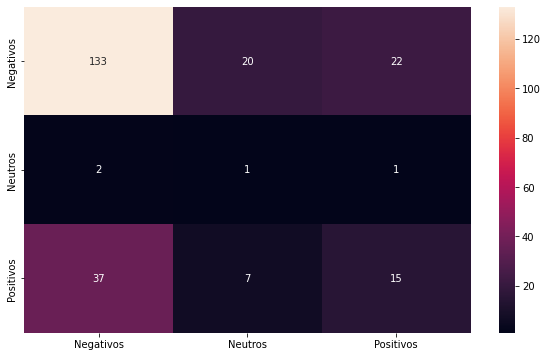

In [71]:
genCm(pred_test,y_pred_mutinomial)

<h2>Complemento de Nayve Bayes</h2>

acurracia media: 0.57




,Polaridade,precision,recall,f1-score,support
0,-1,0.74,0.69,0.71,172
1,0,0.14,0.07,0.10,28
2,1,0.25,0.42,0.31,38


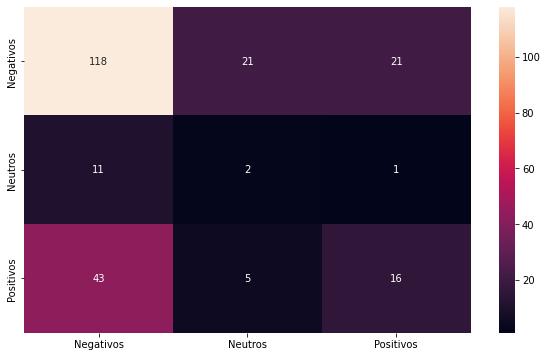

In [72]:
genCm(pred_test,y_pred_complement)

<h2>Arvore de decisão</h2>

acurracia media: 0.61




,Polaridade,precision,recall,f1-score,support
0,-1,0.78,0.77,0.77,172
1,0,0.00,0.00,0.00,28
2,1,0.19,0.34,0.25,38


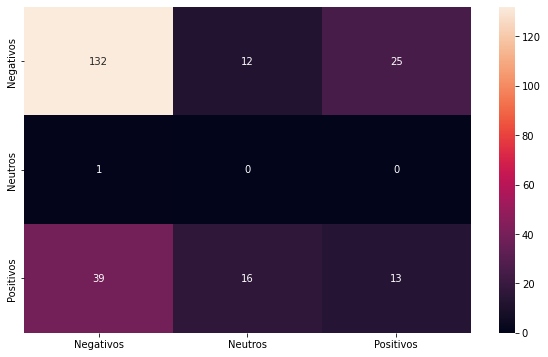

In [73]:
genCm(pred_test,y_pred_decisionTree)

<h2>SGD</h2>


acurracia media: 0.60




,Polaridade,precision,recall,f1-score,support
0,-1,0.79,0.72,0.76,172
1,0,0.20,0.07,0.11,28
2,1,0.24,0.45,0.31,38


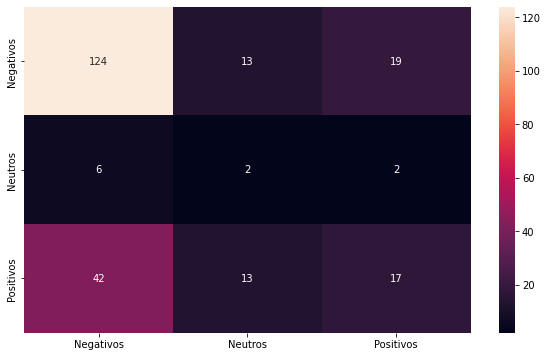

In [74]:
genCm(pred_test,y_pred_SGD)

<h2>KNN</h2>

acurracia media: 0.53




,Polaridade,precision,recall,f1-score,support
0,-1,0.74,0.61,0.67,172
1,0,0.00,0.00,0.00,28
2,1,0.22,0.55,0.32,38


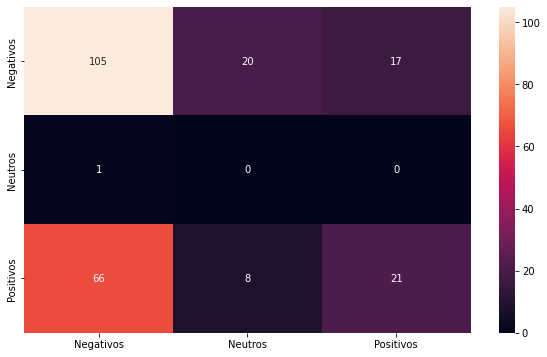

In [75]:
genCm(pred_test,Y_pred_knn)

Nenhum dos modelos apresentou um grau de precisão satisfatorio, entao utilizando uma base de dados criada a partir do imdb os modelos passaram por uma nova etapa de treino afim de melhorar seus resultados na avaliação de tweets com polaridade positiva ou neutra 

In [76]:

Newdf = pd.read_csv ('./Datasetmerge.csv')

posts2 = Newdf['Tweets'].to_numpy()
polaridade2 =  Newdf['Polaridade'].to_numpy()


print(Newdf.shape)



(15105, 3)


In [77]:
text2 = []
pol2= []
teste2 = []
testey = []
j=0
negativos = positivos = neutros=0
k=0

for k in range(len(posts2)):
    
    if(polaridade2[k] == 1 and positivos < 1000) :
        teste2.append(cleanText(posts2[k])) 
        testey.append((polaridade2[k]))
        positivos += 1
        np.delete(polaridade2,k)
        np.delete(posts2,k)

        
    elif(polaridade2[k] == 0 and neutros < 1000) :
        teste2.append(cleanText(posts2[k])) 
        testey.append((polaridade2[k]))
        neutros += 1
        np.delete(polaridade2,k)
        np.delete(posts2,k)
    
    elif(polaridade2[k] == -1 and negativos < 1000) :
        teste2.append(cleanText(posts2[k])) 
        testey.append((polaridade2[k]))
        negativos += 1
        np.delete(polaridade2,k)
        np.delete(posts2,k)
    

for j in  range(len(posts2)) :
    
    if j < 10000:
            text2.append(cleanText(posts2[j]))
            pol2.append((polaridade2[j])) 
        
    else :
        break
        

    

In [78]:
xvec2= cv.fit_transform(text2).toarray()
xtvec2 = cv.transform(teste2).toarray()



In [ ]:
clfMultinomial2 = MultinomialNB()
clfComplementNB2 = ComplementNB()
clfDecisionTree2 = tree.DecisionTreeClassifier()
clfSGD2 = SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)
clfknn2 = NearestCentroid()

clfMultinomial2.fit(xvec2,pol2)
clfComplementNB2.fit(xvec2,pol2)
clfDecisionTree2.fit(xvec2,pol2)
clfSGD2.fit(xvec2,pol2)
clfknn2.fit(xvec2,pol2)









In [ ]:
y_pred_mutinomial2 = clfMultinomial2.predict(xtvec2) 
y_pred_complement2 = clfComplementNB2.predict(xtvec2) 
y_pred_decisionTree2 = clfDecisionTree2.predict(xtvec2) 
y_pred_SGD2 = clfSGD2.predict(xtvec2) 
Y_pred_knn2 = clfknn2.predict(xtvec2)


In [ ]:
print(len(testey))
print(len(y_pred_mutinomial2))

<h2>Classificador Multinomial Nayve Bayes<h2>
    

In [ ]:
genCm(testey,y_pred_mutinomial2)


<h2>Complemento de Nayve Bayes</h2>

In [ ]:
genCm(testey,y_pred_complement2)

<h2>Arvore de decisão</h2>

In [ ]:
genCm(testey,y_pred_decisionTree2)

<h2>SGD</h2>


In [ ]:
genCm(testey,y_pred_SGD2)

<h2>KNN</h2>

In [ ]:
genCm(testey,Y_pred_knn2)

In [ ]:
tweets_list2 = []
res=[]
dft=[]

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('doutor estranho since:2022-05-22 until:2022-05-24 lang:pt').get_items()):
    if i>500:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

testtt = tweets_df2['Text'].to_numpy()

In [ ]:
p=0
for p in  range(len(testtt)) :
    res.append(testtt[p])
    

    
xtvec3 = cv.transform(res).toarray()


y_pred_SGD3 = clfSGD2.predict(xtvec3)
g=y_pred_SGD3[0]







tweets_df23 = pd.DataFrame(res)
tweets_df24 = pd.DataFrame(y_pred_SGD3)


tweets_df23
tweets_df24


        



In [ ]:
with open('stopwords.pickle', 'wb') as f:
    pickle.dump(stopwords,f)
with open('classificador.pickle', 'wb') as f:
    pickle.dump(clfDecisionTree2,f)
with open('cv.pickle', 'wb') as f:
    pickle.dump(cv,f)
    

In [ ]:
pip freeze > requirements.txt